# Reproducing Figure S3

_04SEP20_: 

To address reviewer concerns and incorporating suggestions from the group, we decided to:
1. Downsample the 10x data to recreate the tSNE in Figure S3A
2. Remove the Harmony analysis and simply show a side-by-side of the 10x tSNE with the XYZeq tSNE.

If the 10x tSNE seems to better match the results from XYZeq, we will likely also adjust the cell type proportion correlations in FigS3C and the heatmap in Figure 3C.

In [1]:
import scanpy as sc
import pandas as pd 
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import warnings
import itertools as it
import pickle as pkl
import os
from copy import copy
import warnings
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import seaborn as sns

import json
import requests
# from IPython.display import display, HTML
# import bbknn
import time

In [2]:
sc.settings.verbosity = 4
sc.settings.set_figure_params(dpi=80)

In [3]:
prefix = '/data/xyzeq/'

### Load in the data

In [4]:
with open('/data/xyzeq/10x/5prime_liver/downsample/10x.down.pkl','rb') as file:
    adata_10x = pkl.load(file)['mouse_down']

In [5]:
adata_xyz = sc.read_h5ad(prefix + 'box.data4/all_batches_mouse_only_processed.h5ad')

In [6]:
np.where(adata_xyz.raw.X > 0)

(array([   0,    0,    0, ..., 6622, 6622, 6622]),
 array([ 3347,  4385,  4924, ..., 55130, 55197, 55257]))

In [7]:
adata_xyz.raw.X[0, 3347]

0.6929356

Raw values have been transformed. Checking `spatial/notebooks/figures/XYZeq_fig3_decontaminated_clustering.ipynb`, it looks like they've only been log transformed.

In [8]:
adata_xyz.raw.X.sum(axis=1)

array([430.50928, 524.22565, 374.18756, ..., 956.88336, 259.64786,
       622.6367 ], dtype=float32)

Doesn't looks like they've been normalized per cell. This is good!

Adjust `var` names:

In [9]:
adata_xyz.var_names = [i[5:] for i in adata_xyz.var_names]
adata_xyz.var_names_make_unique()

In [10]:
new_raw = adata_xyz.raw.to_adata()
new_raw.var_names = [i[5:] for i in new_raw.var_names]
new_raw.var_names_make_unique()
adata_xyz.raw = new_raw

In [11]:
print(adata_10x.obs.columns)
print(adata_xyz.obs.columns)

Index(['mouse_counts', 'human_counts', 'percent_mito', 'n_counts', 'leiden',
       'celltype'],
      dtype='object')
Index(['batch', 'n_counts', 'log_counts', 'n_genes', 'barcode',
       'percent_mito_mouse', 'percent_mito_human', 'mouse_counts',
       'human_counts', 'ratio', 'cell_call', 'contam_init', 'tsne_density',
       'leiden', 'CellType', '__is_in_cluster__'],
      dtype='object')


### Visualize

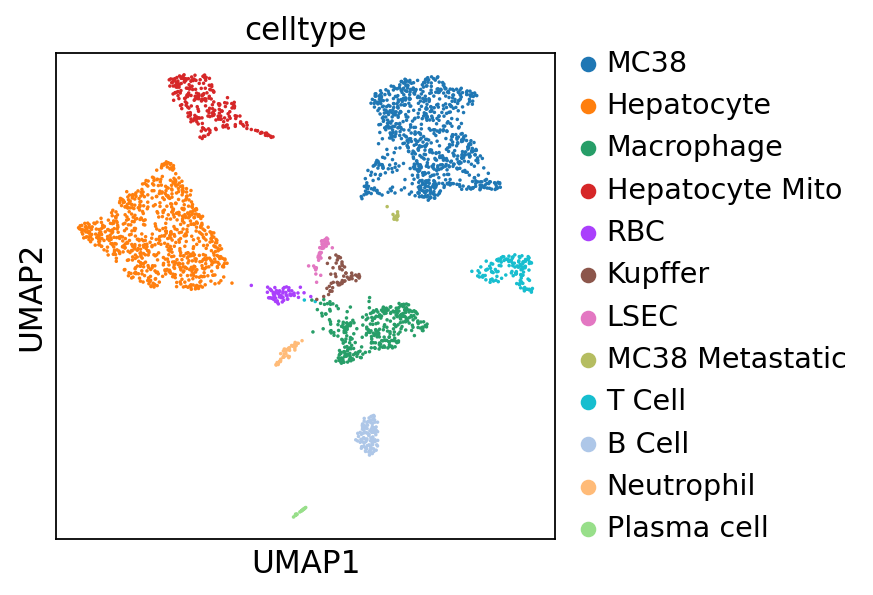

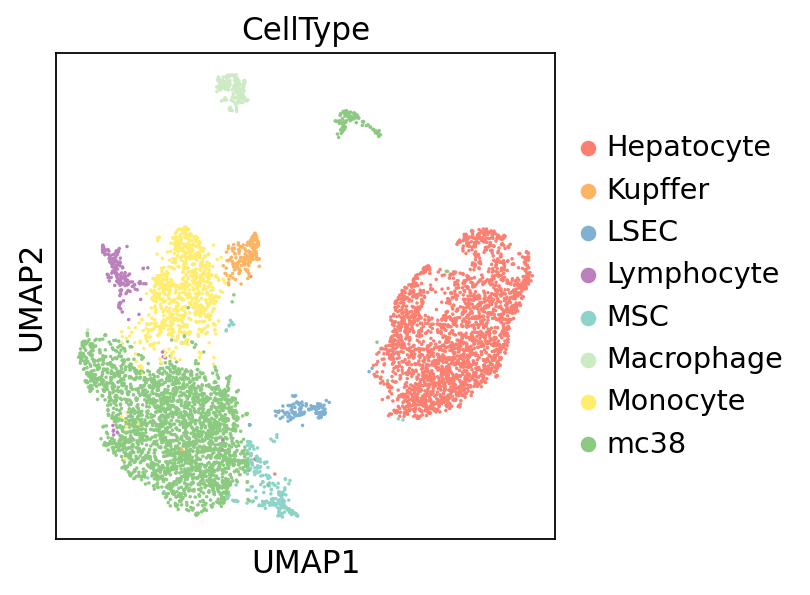

In [12]:
sc.pl.umap(adata_10x,color=['celltype'], size=10)
sc.pl.umap(adata_xyz,color=['CellType',], size=10)